# Checking each files.

In [43]:
%matplotlib inline
import h5py
import os
import time

# import seaborn as sns
import numpy as np
#import plotly.express as px

#from fpdf import FPDF

from matplotlib import pyplot as plt
from importlib import reload

np.set_printoptions(suppress=True)

In [52]:
f_czt1 ="/Users/swasti/code/beamtest/run8/older_archive/2022-04-26_CZT_run08-000_L0calv1.0_LTA_L1.h5"
f_czt2 ="/Users/swasti/code/beamtest/run8/2022-04-26_CZT_run08-000_L0_cal_v2.1_L1_v0.2_L2.h5"

In [53]:
fcud = "/Users/swasti/code/beamtest/run8/cud_combined.CUD.h5" 

In [54]:
czt1 = h5py.File(f_czt1,'r')
czt2 = h5py.File(f_czt2,'r')
cud = h5py.File(fcud,'r')

In [59]:
czt2['CZT'].keys(), czt1['eventdata/czt'].keys(), cud['Events/CZT'].keys()

(<KeysViewHDF5 ['AnodePulseheight', 'AnodeTime', 'AsicTemp', 'BadPadflag', 'CathodePulseheight', 'CathodeTime', 'CorUTC', 'Energy', 'EventID', 'EventTime', 'PadPulseheight', 'Position']>,
 <KeysViewHDF5 ['anode_digitime', 'anode_pulseheight', 'asic_temperature', 'cathode_digitime', 'cathode_pulseheight', 'energy', 'energy_unsupressed', 'event_id', 'event_time', 'pad_pulseheight', 'position', 'utc_corr']>,
 <KeysViewHDF5 ['AnodePulseheight', 'AnodeTime', 'AsicTemp', 'BadPadflag', 'CathodePulseheight', 'CathodeTime', 'CorUTC', 'Energy', 'EventID', 'EventTime', 'PadPulseheight', 'Position']>)

In [60]:
t_czt1_id = czt1['eventdata/czt/event_id'][...]
t_czt2_id = czt2['CZT/EventID'][...]
t_cud_id =  cud['Events/CZT/EventID'][...]
t_index_czt1 = np.where(t_czt1_id > 0)
t_index_czt2 = np.where(t_czt2_id > 0)
t_index_cud = np.where(t_cud_id > 0)

In [61]:
czt1_nrg_arr = czt1['eventdata/czt/energy'][...][t_index_czt1]
czt2_nrg_arr = czt2['CZT/Energy'][...][t_index_czt2]
czt3_nrg_arr = cud['Events/CZT/Energy'][...][t_index_cud]

In [62]:
czt1_nrg_arr.shape, czt2_nrg_arr.shape, czt3_nrg_arr.shape

((469669, 16, 16), (469669, 16, 16), (469669, 16, 16))

In [33]:
Czt_sum_arr1= czt1_nrg_arr.sum(axis = tuple(range(1,3)) )
Czt_sum_arr2= czt2_nrg_arr.sum(axis = tuple(range(1,3)) )

In [34]:
e_min = 1.0 
e_max = 3000
bin_width = 10.00
n_bins = int((e_max-e_min)/bin_width)
n_bins, e_max

(299, 3000)

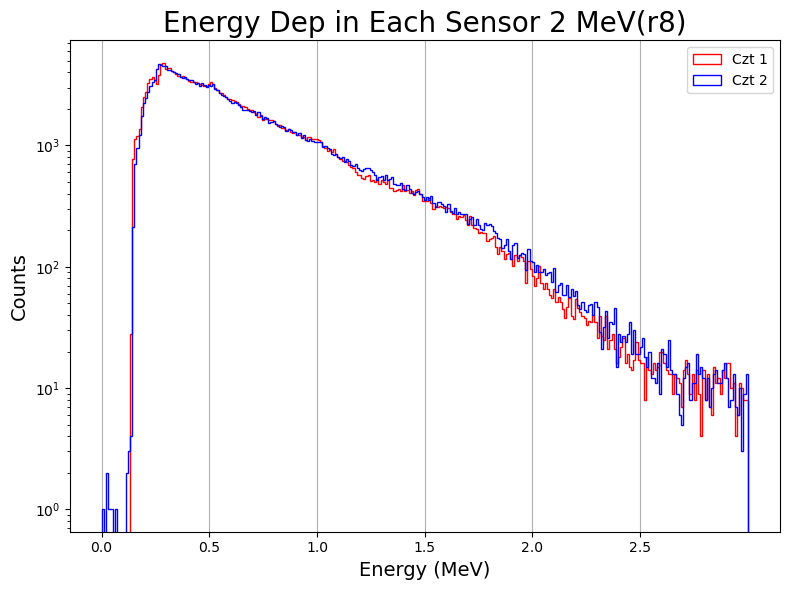

In [42]:
plt.rcParams["figure.figsize"] = [8, 6]  
plt=reload(plt)
plt.hist(np.array(Czt_sum_arr1)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='Czt 1', histtype = 'step',color='red')
plt.hist(np.array(Czt_sum_arr2)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='Czt 2', histtype = 'step',color='blue')


plt.xlabel("Energy (MeV)", size=14)
plt.ylabel("Counts", size=14)
plt.title(f"Energy Dep in Each Sensor 2 MeV(r8)", size = 20)

# plt.xlim(xlim_min/1000.0,xlim_max/1000.0)

#plt.ylim(0,2000)
plt.yscale('log')
plt.tight_layout()
plt.grid(axis = 'x')

plt.xticks(np.arange(0,3,.5))
plt.legend()
# plt.savefig(f"{fpath}NrgDep_Ind_2MeV_log.jpeg")